### Import Libraries

In [26]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize

In [27]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

pd.set_option("display.width", 200)
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_colwidth", None)

####  Fasttext aligned embeddings

In [28]:
def load_embeddings_and_labels(lang_prefix):
    X_train = np.load(f"../../model/{lang_prefix}_fasttext_train_embeddings.npy")
    X_test = np.load(f"../../model/{lang_prefix}_fasttext_test_embeddings.npy")
    labels = np.load(f"../../model/{lang_prefix}_train_test_labels.npz")
    y_train, y_test = labels["y_train"], labels["y_test"]
    return X_train, X_test, y_train, y_test

#### Bert embeddings

In [ ]:
def load_bert_embeddings(lang_prefix):
    X_train = np.load(f"../../model/{lang_prefix}_bert_train_embeddings.npy")
    X_test = np.load(f"../../model/{lang_prefix}_bert_test_embeddings.npy")
    return X_train, X_test

#### Concatenate

In [30]:
def normalize_concat(ft_train, ft_test, bert_train, bert_test):
    ft_train = normalize(ft_train)
    ft_test = normalize(ft_test)
    bert_train = normalize(bert_train)
    bert_test = normalize(bert_test)
    
    return (
        np.concatenate([ft_train, bert_train], axis=1),
        np.concatenate([ft_test, bert_test], axis=1),
    )

### Model Training and Evaluation

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    result = []
    for label, X, y in [("Test", X_test, y_test), ("Train", X_train, y_train)]:
        y_pred = model.predict(X)

        # Print classification report
        print(f"\n{label} Classification Report ({name}):\n")
        print(classification_report(y, y_pred))

        # Plot confusion matrix
        ConfusionMatrixDisplay.from_estimator(
            model, X, y, display_labels=["Negative", "Positive"], cmap="Blues"
        )
        plt.title(f"{name} Confusion Matrix ({label} Set)")
        plt.show()

        report = classification_report(y, y_pred, output_dict=True, zero_division=0)
        acc = accuracy_score(y, y_pred)
        result.append(
            {
                "Model": name,
                "Dataset": label,
                "Accuracy": acc,
                "Precision": report["weighted avg"]["precision"],
                "Recall": report["weighted avg"]["recall"],
                "F1-Score": report["weighted avg"]["f1-score"],
            }
        )
    return result

In [20]:
def run_hybrid_model(lang_name, lang_prefix):
    print(f"\n{'-'*20} {lang_name.upper()} {'-'*20}")
    ft_train, ft_test, y_train, y_test = load_embeddings_and_labels(lang_prefix)
    bert_train, bert_test = load_bert_embeddings(lang_prefix)

    X_train_hybrid, X_test_hybrid = normalize_concat(
        ft_train, ft_test, bert_train, bert_test
    )

    all_results = []
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": LinearSVC(),
    }
    for name, model in models.items():
        res = evaluate_model(
            name, model, X_train_hybrid, X_test_hybrid, y_train, y_test
        )
        for r in res:
            r["Language"] = lang_name
        all_results.extend(res)
    return all_results

### English + Korean


-------------------- ENGLISH + KOREAN --------------------

Test Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     20063
           1       0.76      0.73      0.75     19937

    accuracy                           0.75     40000
   macro avg       0.75      0.75      0.75     40000
weighted avg       0.75      0.75      0.75     40000



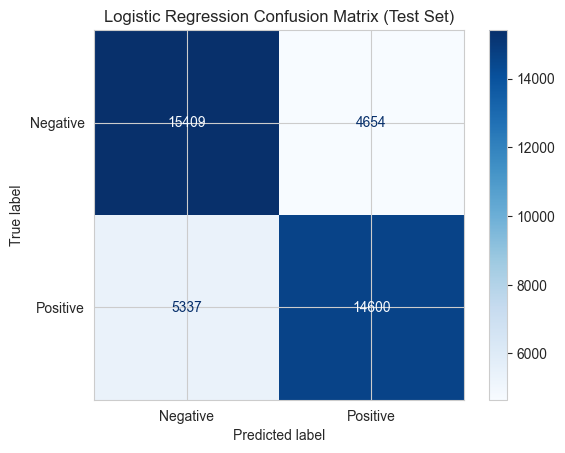


Train Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.74      0.77      0.75     79937
           1       0.76      0.73      0.74     80063

    accuracy                           0.75    160000
   macro avg       0.75      0.75      0.75    160000
weighted avg       0.75      0.75      0.75    160000



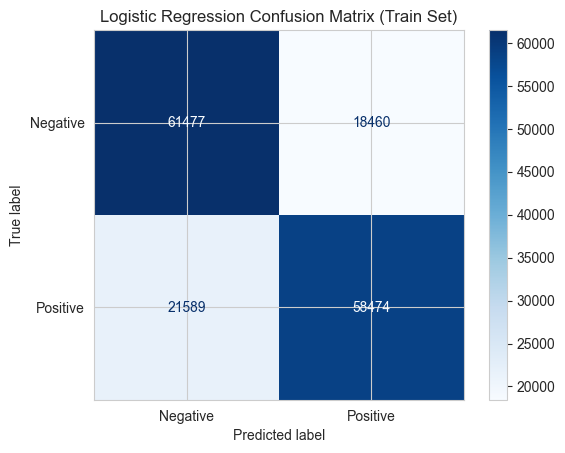


Test Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     20063
           1       0.81      0.77      0.79     19937

    accuracy                           0.80     40000
   macro avg       0.80      0.80      0.80     40000
weighted avg       0.80      0.80      0.80     40000



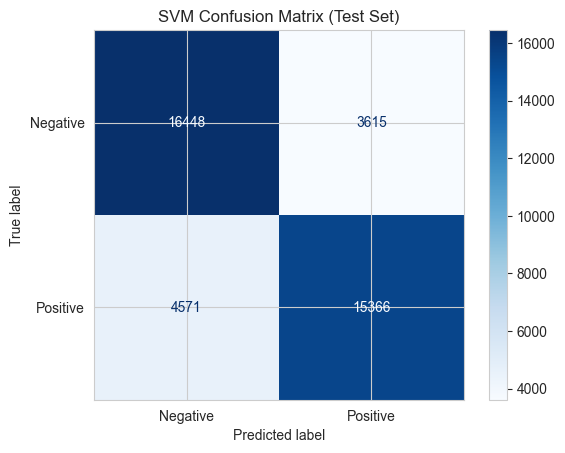


Train Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     79937
           1       0.81      0.77      0.79     80063

    accuracy                           0.79    160000
   macro avg       0.80      0.79      0.79    160000
weighted avg       0.80      0.79      0.79    160000



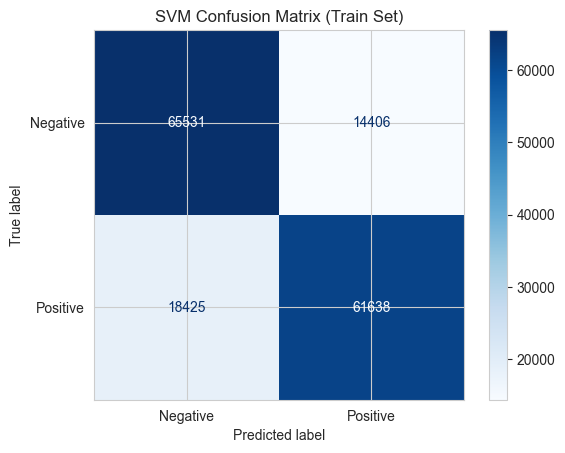

In [21]:
results_all = run_hybrid_model("English + Korean", "both")

### Korean Only 


-------------------- KOREAN --------------------

Test Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     10108
           1       0.82      0.83      0.83      9892

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000



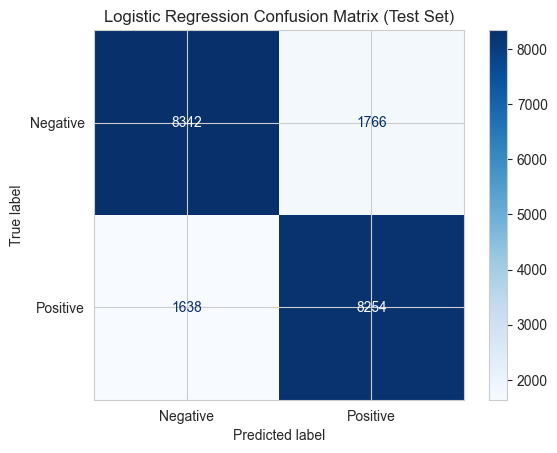


Train Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     39892
           1       0.83      0.84      0.83     40108

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



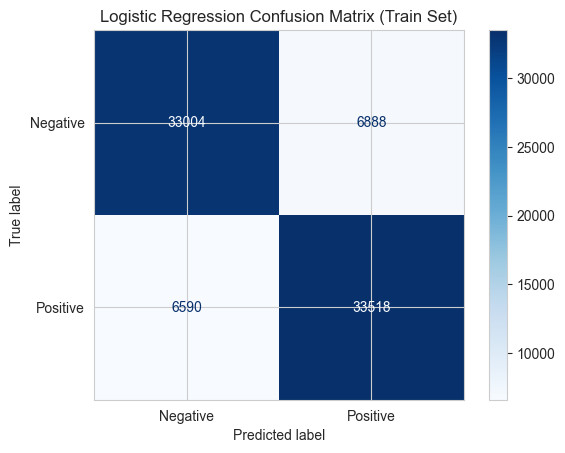


Test Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10108
           1       0.86      0.87      0.86      9892

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



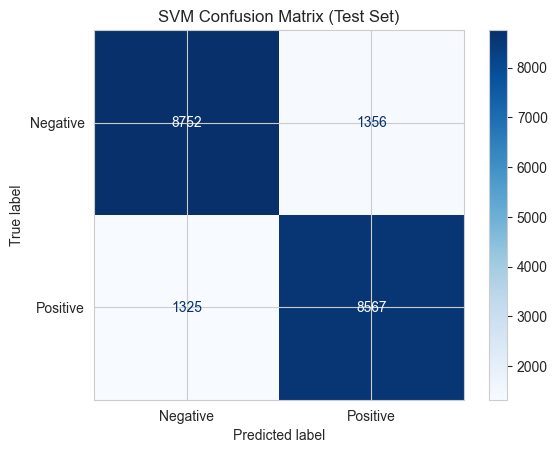


Train Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     39892
           1       0.86      0.87      0.87     40108

    accuracy                           0.87     80000
   macro avg       0.87      0.87      0.87     80000
weighted avg       0.87      0.87      0.87     80000



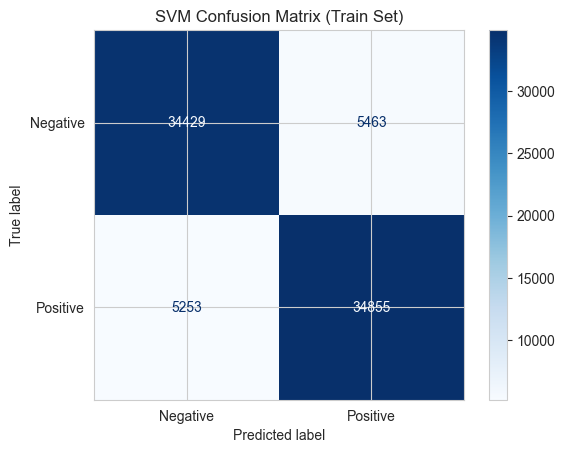

In [23]:
results_ko = run_hybrid_model("Korean", "ko")

### English Only


-------------------- ENGLISH --------------------

Test Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.67      0.75      0.71     10035
           1       0.71      0.62      0.66      9965

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000



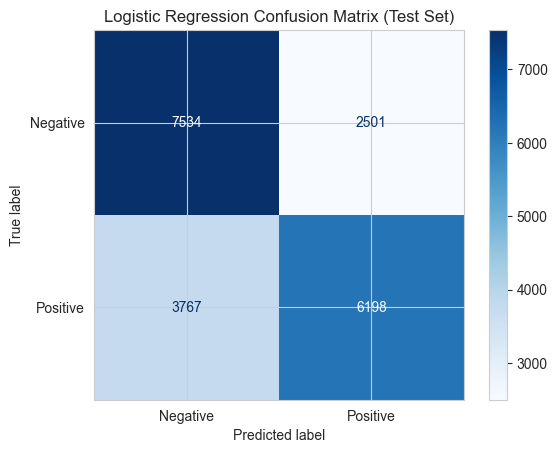


Train Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.66      0.75      0.70     39965
           1       0.71      0.62      0.66     40035

    accuracy                           0.68     80000
   macro avg       0.69      0.68      0.68     80000
weighted avg       0.69      0.68      0.68     80000



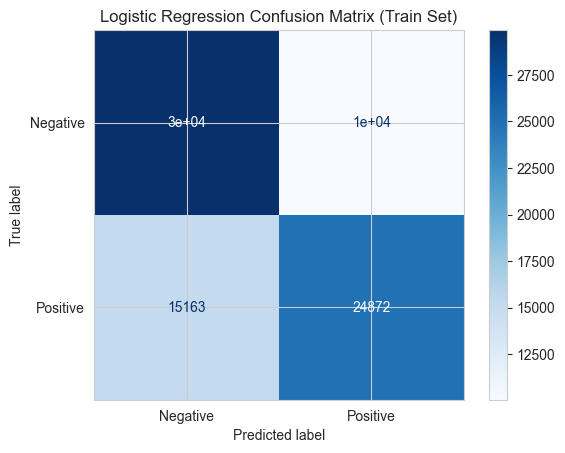


Test Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10035
           1       0.76      0.68      0.72      9965

    accuracy                           0.73     20000
   macro avg       0.74      0.73      0.73     20000
weighted avg       0.74      0.73      0.73     20000



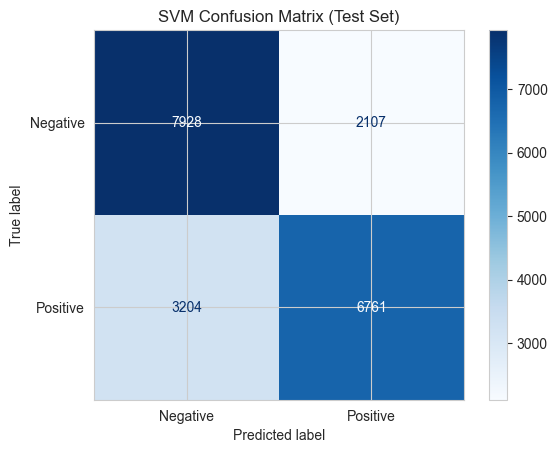


Train Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     39965
           1       0.76      0.67      0.72     40035

    accuracy                           0.73     80000
   macro avg       0.74      0.73      0.73     80000
weighted avg       0.74      0.73      0.73     80000



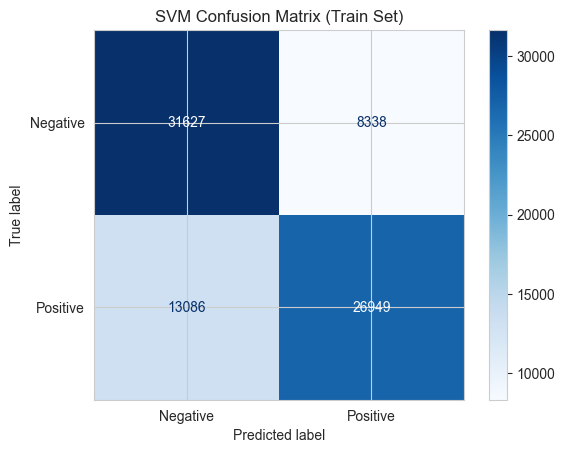

In [22]:
results_en = run_hybrid_model("English", "en")

## Comparing

In [24]:
all_results_df = pd.DataFrame(results_all + results_en + results_ko)
print("\nFINAL COMPARISON SUMMARY")
print(tabulate(all_results_df, headers="keys", tablefmt="psql"))


FINAL COMPARISON SUMMARY
+----+---------------------+-----------+------------+-------------+----------+------------+------------------+
|    | Model               | Dataset   |   Accuracy |   Precision |   Recall |   F1-Score | Language         |
|----+---------------------+-----------+------------+-------------+----------+------------+------------------|
|  0 | Logistic Regression | Test      |   0.750225 |    0.75049  | 0.750225 |   0.750139 | English + Korean |
|  1 | Logistic Regression | Train     |   0.749694 |    0.750084 | 0.749694 |   0.749602 | English + Korean |
|  2 | SVM                 | Test      |   0.79535  |    0.795996 | 0.79535  |   0.795218 | English + Korean |
|  3 | SVM                 | Train     |   0.794806 |    0.79556  | 0.794806 |   0.794681 | English + Korean |
|  4 | Logistic Regression | Test      |   0.6866   |    0.689501 | 0.6866   |   0.685269 | English          |
|  5 | Logistic Regression | Train     |   0.684725 |    0.687818 | 0.684725 |   0.683

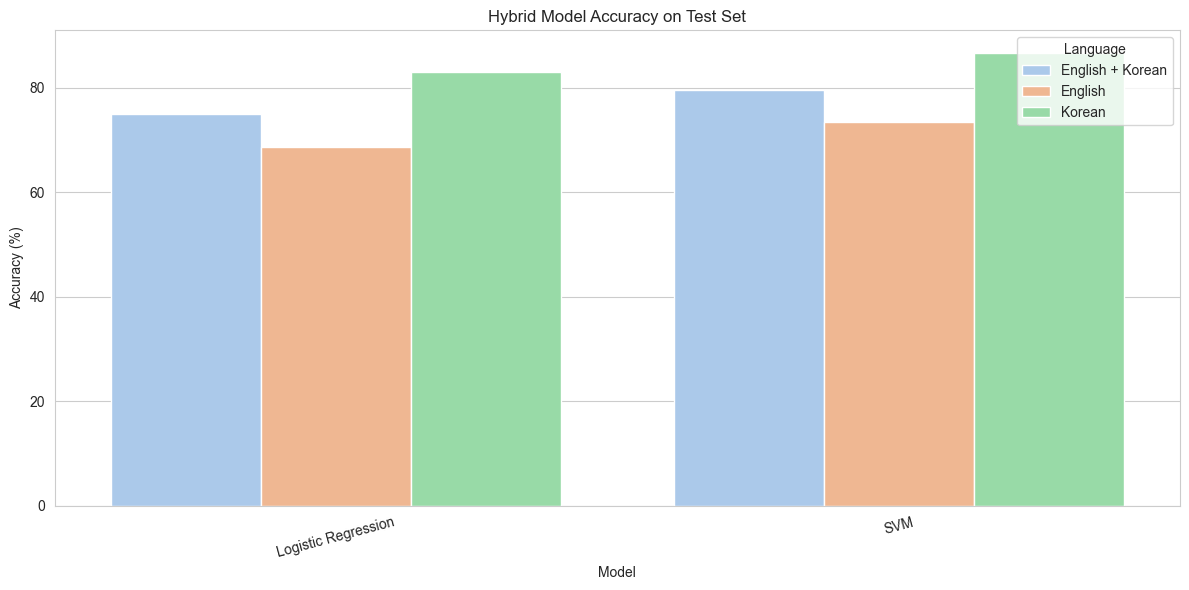

In [25]:
plt.figure(figsize=(12, 6))
subset = all_results_df[all_results_df["Dataset"] == "Test"].copy()
subset["Accuracy_percent"] = subset["Accuracy"] * 100

sns.barplot(data=subset, x="Model", y="Accuracy_percent", hue="Language")
plt.title("Hybrid Model Accuracy on Test Set")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=15)
plt.legend(title="Language")
plt.tight_layout()
plt.show()